Dataset Shape: (303, 14)


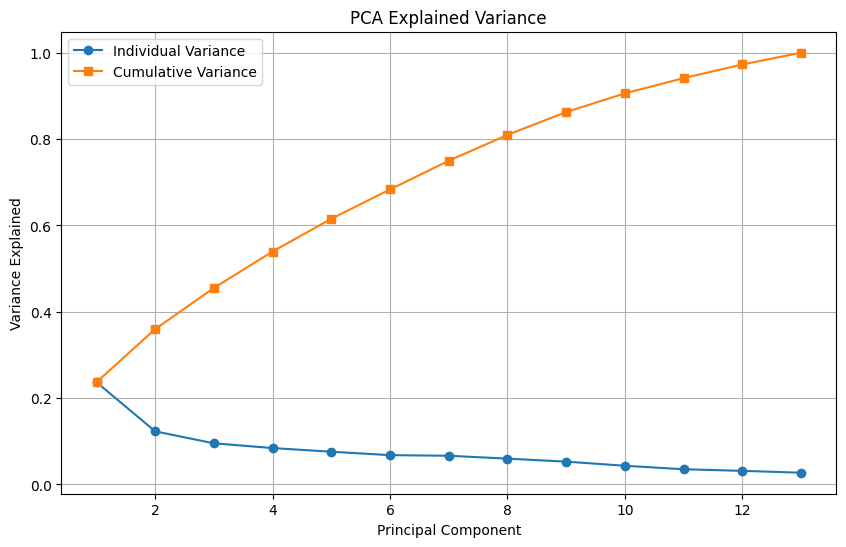

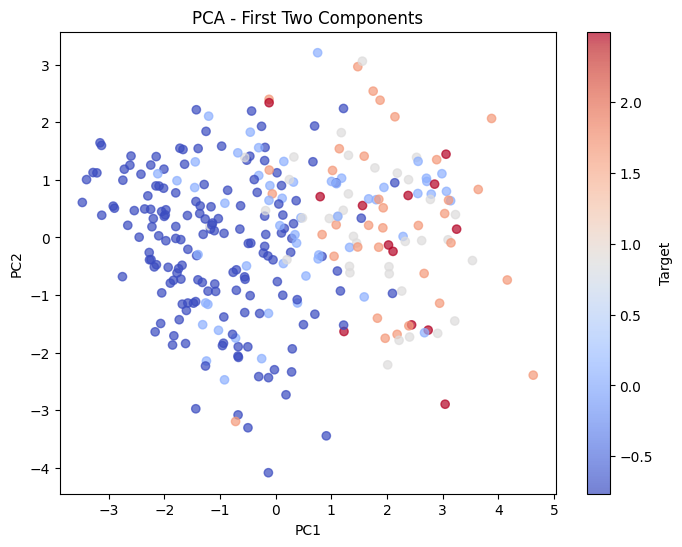


✅ PCA Complete! PCA dataset saved as 'heart_disease_pca.csv'


In [1]:

# 1. Import Libraries
# =========================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# =========================
# 2. Load Cleaned Dataset
# =========================
data = pd.read_csv("/content/heart_disease_cleaned.csv")


print("Dataset Shape:", data.shape)
data.head()

# =========================
# 3. Separate Features & Target
# =========================
target_col = "num"   # <-- fixed target column
X = data.drop(columns=[target_col])
y = data[target_col]

# =========================
# 4. Apply PCA
# =========================
# Standardize again to be safe
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# =========================
# 5. Visualize PCA Results
# =========================

# Scree plot (variance per component)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label="Individual Variance")
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='s', label="Cumulative Variance")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of first 2 PCs
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components")
plt.colorbar(label="Target")
plt.show()

# =========================
# 6. Save PCA-Transformed Data
# =========================
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
pca_df[target_col] = y.values

pca_df.to_csv("heart_disease_pca.csv", index=False)   # <-- consistent with preprocessing save
print("\n✅ PCA Complete! PCA dataset saved as 'heart_disease_pca.csv'")